<a href="https://colab.research.google.com/github/expely/Business-Analytics-Labs/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [40]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df = pd.read_csv("/content/listings.csv.gz")

## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Missing values per column:
 neighbourhood_group_cleansed                    4419
calendar_updated                                4419
neighborhood_overview                           2140
neighbourhood                                   2140
license                                         1500
                                                ... 
instant_bookable                                   0
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
Length: 79, dtype: int64


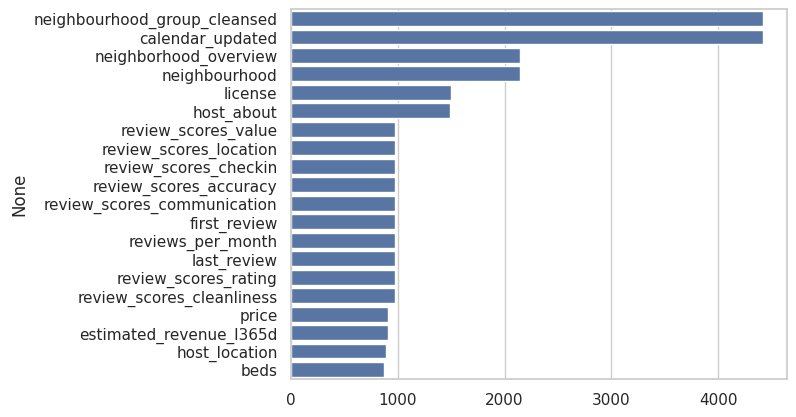

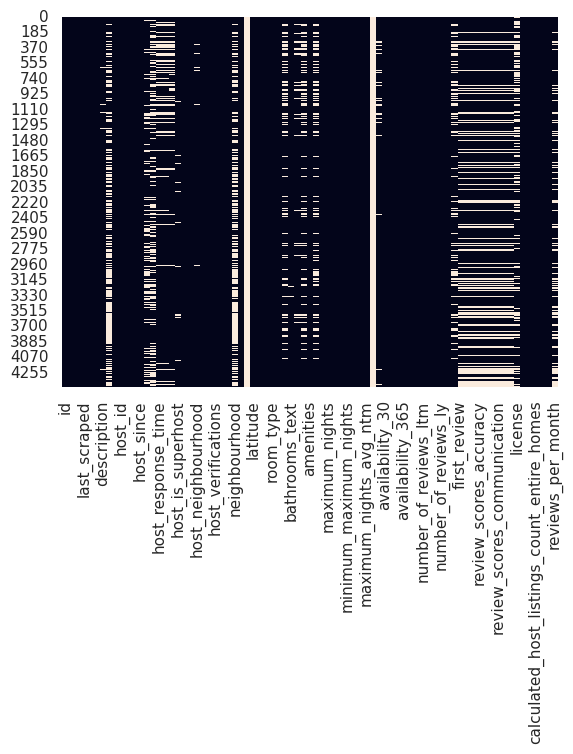

In [42]:
# View missing value counts
print("Missing values per column:\n", df.isnull().sum().sort_values(ascending=False))

sns.set(style="whitegrid")

# Visual A: Barchart of Missing Data
top_missing_cols = df.isnull().sum().sort_values(ascending=False).head(20)
sns.barplot(x=top_missing_cols.values, y=top_missing_cols.index)
plt.show()

# Visual B: Heatmap of Missing Data
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### ✍️ Your Response: 🔧
1. The top three columns are `neighbourhood_group_cleansed`, `calendar_updated`, and a tied third of `neighborhood_overview` and `neighbourhood`

2. The `review_score_rating` is going to be hard in order to assess how good the stay was. We likely wouldn't be able to do a lot of analysis with null data there. For any kind of price modeling we would want to do, having information like `bathrooms`, `bedrooms`, `beds`, etc. Are going to be very useful. We likely can't drop any of these columns.

3. We can likely drop `license` since there isn't much business value, or much to analyze off of it. We could also delete the top two missing columns since they don't matter much from a business sense, and they provide a lot of null values, indicating the lack of statistical signifigance. `neighborhood_overview` and `host_about` are also not going to be useful as they are just unstructured text.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [43]:
# Drop the top unused columns
df.drop(["license", "neighbourhood_group_cleansed", "calendar_updated", "neighborhood_overview"], axis=1, inplace=True)

# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4419 non-null   int64  
 1   listing_url                                   4419 non-null   object 
 2   scrape_id                                     4419 non-null   int64  
 3   last_scraped                                  4419 non-null   object 
 4   source                                        4419 non-null   object 
 5   name                                          4419 non-null   object 
 6   description                                   4372 non-null   object 
 7   picture_url                                   4419 non-null   object 
 8   host_id                                       4419 non-null   int64  
 9   host_url                                      4419 non-null   o

### ✍️ Your Response: 🔧
1. I dropped "license", "neighbourhood_group_cleansed", "calendar_updated", "neighborhood_overview"

2. License didn't have much value as it didn't provide with concrete categorical or numeric data. Neighbourhood_group_cleansed and "calendar_updated" had an almost 100% null rate, not making the data useful. And neighborhood_overview was just unstructured text we didn't want.

3. It would have been a pain to work with the group cleansed and calendar updated as they don't mean anything to the data. Same with Neighborhood_overview and license, it just would add noise to whatever we are working with.



## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [44]:
# Impute median for bedrooms
df['bedrooms'] = df['bedrooms'].fillna(df.groupby('property_type')['bedrooms'].transform('median'))

# Fill null review frequency with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4419 non-null   int64  
 1   listing_url                                   4419 non-null   object 
 2   scrape_id                                     4419 non-null   int64  
 3   last_scraped                                  4419 non-null   object 
 4   source                                        4419 non-null   object 
 5   name                                          4419 non-null   object 
 6   description                                   4372 non-null   object 
 7   picture_url                                   4419 non-null   object 
 8   host_id                                       4419 non-null   int64  
 9   host_url                                      4419 non-null   o

### ✍️ Your Response: 🔧
1. I cleaned `bedrooms` and `reviews_per_month`

2. I imputed the median value into bedrooms with respect to the property type, as we can assume there is a pretty tight relationship between them. This also would ignore outliers over using the mean. I just set null values of the reviews per month to 0 as it usually means that there just hasn't been any reviews for that property.

3. If there are outliers linked to the property type, that could be a risk. We also haven't verified that the null values for property reviews usually mean 0. It could just be an error in the data.


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [45]:
# Fix price Column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4419 entries, 0 to 4418
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3506 non-null   float64
dtypes: float64(1)
memory usage: 34.7 KB


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1781381826.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


### ✍️ Your Response: 🔧
1. Price was an object (string specifically) as it was represented as "$100.00".

2. We first needed to remove the '$'. Then we used the `.astype()` function to convert it to a float. Otherwise it would have thrown an error.

3. The price being numeric is way more useful, since now we can analyze the data and show different items as they relate to price. We can run correlations on it as well.

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [46]:
# Check for exact duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Number of duplicate row ids: {df.id.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate row ids: 0


### ✍️ Your Response: 🔧 🔧
1. I did not find any direct duplicates or duplicates of the ids.

2. I decided to keep all of them, as we wouldn't need to drop anything since they are all unique and therefore valuable.

3. Because it gives statistical weight to those property listings. Especially if they create a machine learning or statistical model they are primed for overfitting their model to the duplicate data.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [47]:
# Export CSV
df.to_csv("cleaned_airbnb_data_6.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. By far the most challenging part was trying to figure out a good way to represent the null columns in the data visually. The bar chart and the heat map weren't super intuitive in creating. It was also surprising the amount of crucial information not being stored like price. There were a lot of values in price that were null.
2. I mostly decided based on how valuable the data was. If the data was unstructured, or contained a *lot* of null data, it was axed. I would fix the data that was crucial, but not an independent variable, and kept the rest of the columns, as they usually can't hurt. We can decide later whether to not include a column in an analysis.
3. They are going to have a lot easier time analyzing that price column. Now that it is a float in USD, they are actually able to predict it with a regression model.
4. I would have liked to gone through and removed all the null data, there just were too many columns to worry about in that regard. I think that would improve the data set a lot.
5. This directly relates as one of my goals was learning how to clean data with python. I think it's one of the most useful reasons why python is chosen for data analysis and so having this skill under my belt is incredible!


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [48]:
!jupyter nbconvert --to html "assignment_06_data_cleaning.ipynb"

[NbConvertApp] Converting notebook assignment_06_data_cleaning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 514484 bytes to assignment_06_data_cleaning.html
